In [1]:
import pandas as pd
import numpy as np
import os
import glob
import sys

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import seaborn as sns

import src.utils as my_u
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


file_list = glob.glob("./dataset/wang/RAW/GSE83139_tbx-v-f-norm-ntv-cpms.csv")
print(file_list)

['./dataset/wang/RAW/GSE83139_tbx-v-f-norm-ntv-cpms.csv']


In [2]:
LABEL = 'Sample_characteristics_ch1'

total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep='\t', index_col=6)
    total_data = total_data.append(data)
    print(total_data.shape)

labels = pd.read_csv('./dataset/wang/RAW/label.txt', sep='\t', index_col=0)
labels2 = pd.read_csv('./dataset/wang/RAW/label2.txt', sep='\t', index_col=0)
labels = pd.concat([labels,labels2],axis=1)

labels.columns = [k.split("_")[1] for k in labels.columns]

#labels = labels[LABEL]
total_data = total_data.iloc[:,6:]
total_data.columns = [k.split(".")[1] for k in total_data.columns]

total_data = total_data.append(labels)
total_data=total_data.transpose()

labels = total_data[LABEL]
labels = labels.values.tolist()
total_data.pop(LABEL)
total_data = total_data.astype('float32')
print(set(labels))

(19950, 641)
                 GCG        MALAT1          REG1A       PPY            SST  \
12730  253395.515625  16790.371094   75445.992188  0.144511       4.154782   
12731   85740.859375  51819.625000      19.392418  0.164907  191100.812500   
12732  261497.812500  50224.300781      11.706527  6.966856       3.273362   
12733  216922.765625  31687.972656     390.484222  0.204404       3.557289   
12734      73.009270  87279.023438  326211.406250  0.136891       7.812166   
...              ...           ...            ...       ...            ...   
29499      17.281572  47402.515625    4685.527832  0.178522      10.736236   
29500      12.843336  56297.843750      21.415630  0.178090      15.635378   
29501      21.492899  79595.937500      92.341339  0.186311      15.919699   
29502       3.642504  39072.273438   64367.570312  0.152616       7.482150   
29503       2.901910  65254.566406      54.480118  0.192326      37.353222   

                 TTR          SPP1         PRSS1  

In [3]:
whole_exp = total_data
raw_result, raw_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
log2_result, log2_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
total_result, total_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
total_log2_result, total_log2_df = my_u.tsne_get(whole_exp, labels)
#######

whole_exp = total_data
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_raw_result, mm_raw_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_log2_result, mm_log2_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data.iloc[:,2:]
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)  
whole_exp = whole_exp.replace(np.nan,0) 
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_total_result, mm_total_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_total_log2_result, mm_total_log2_df = my_u.tsne_get(whole_exp, labels)

kmeans #cluster: 4 ARI: 0.30292274480871806 Silhouette: 0.47693098
kmeans #cluster: 7 ARI: 0.2965808825661974 Silhouette: 0.43706128
kmeans #cluster: 4 ARI: 0.35236066562142715 Silhouette: 0.45900032
kmeans #cluster: 9 ARI: 0.3096863714997797 Silhouette: 0.40056664
kmeans #cluster: 4 ARI: 0.29934547343976525 Silhouette: 0.46863005
kmeans #cluster: 7 ARI: 0.30204502952198997 Silhouette: 0.39718908
kmeans #cluster: 8 ARI: 0.3509977568664275 Silhouette: 0.43594816
kmeans #cluster: 9 ARI: 0.32726347746385537 Silhouette: 0.4023135


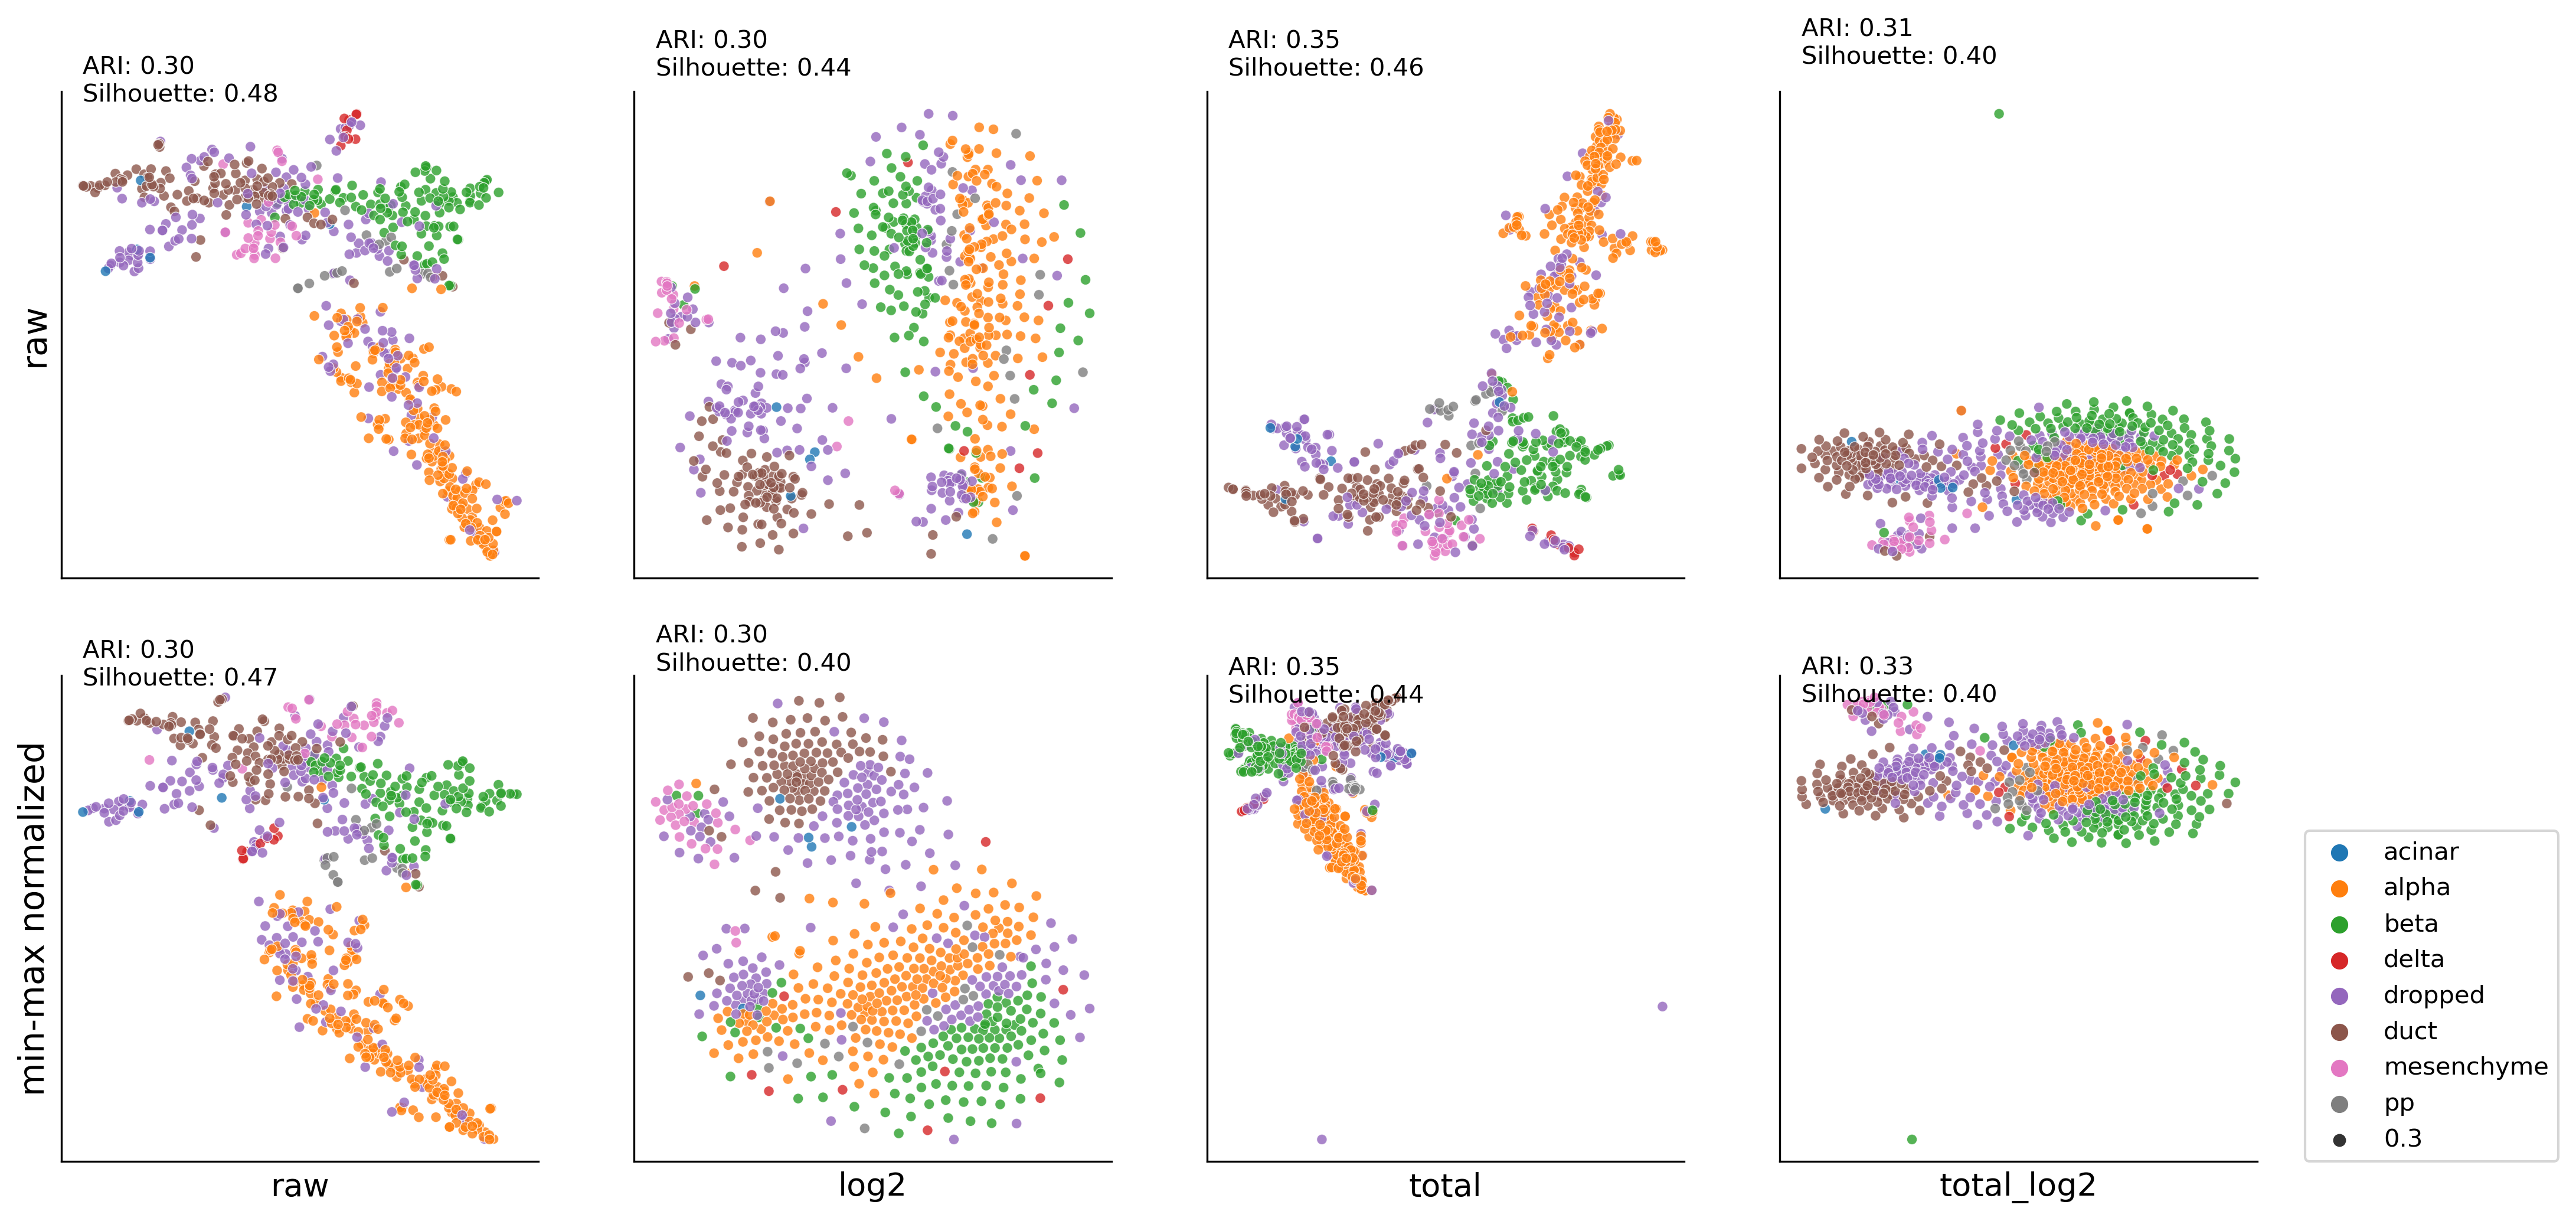

In [6]:
plt.figure(figsize=(16,8), dpi=300)
ax00 = plt.subplot2grid((2,4), (0,0)) 
ax10 = plt.subplot2grid((2,4), (0,1))  
ax20 = plt.subplot2grid((2,4), (0,2))  
ax30 = plt.subplot2grid((2,4), (0,3))  

ax01 = plt.subplot2grid((2,4), (1,0)) 
ax11 = plt.subplot2grid((2,4), (1,1))  
ax21 = plt.subplot2grid((2,4), (1,2))  
ax31 = plt.subplot2grid((2,4), (1,3))  

my_u.draw_plot(raw_df, raw_result, ax00, labels)
my_u.draw_plot(log2_df, log2_result, ax10, labels)
my_u.draw_plot(total_df, total_result, ax20, labels)
my_u.draw_plot(total_log2_df, total_log2_result, ax30, labels)
my_u.draw_plot(mm_raw_df, mm_raw_result, ax01, labels)
my_u.draw_plot(mm_log2_df, mm_log2_result, ax11, labels)
my_u.draw_plot(mm_total_df, mm_total_result, ax21, labels)
my_u.draw_plot(mm_total_log2_df, mm_total_log2_result, ax31, labels)

ax00.set_ylabel('raw' , fontsize=14)

ax01.set_xlabel('raw', fontsize=13)
ax11.set_xlabel('log2', fontsize=13)
ax21.set_xlabel('total', fontsize=13)
ax31.set_xlabel('total_log2', fontsize=13)
ax01.set_ylabel('min-max normalized' , fontsize=14)
ax31.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)